In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute, QuantumRegister, ClassicalRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
def print_statevector(qstate):
    reg = ["00", "01", "10", "11"]
    qstate = np.asarray(qstate)
    for i in range(len(qstate)):
        print((str(np.round(qstate[i],3))+"|"+reg[i]+"> "),end="  ")
            
def sv_simulate_circuit(qc):            
    backend = Aer.get_backend('statevector_simulator') # Tell it which simulator you want to use 
    job = execute(qc,backend) # Put in the name of your quantum circuit where it says qc
    result = job.result() 

    state = np.asarray(result.get_statevector())
    
    amplitude_list = []
    for amplitude in state:
        amplitude_list.append(np.round(amplitude,3))
        
    return amplitude_list

def aer_simulate_circuit(qc):
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc,backend, shots = 1024)
    result = job.result()         
    return result.get_counts()

In [3]:
def pair_preparation(qc: QuantumCircuit) -> QuantumCircuit:
    qc.h(0)
    qc.cx(0,1)
    qc.barrier()
    return qc
    
def encode(qc: QuantumCircuit, bitString: str) -> QuantumCircuit:
    bitZero = int(bitString[1])
    bitOne = int(bitString[0])
    
    if bitOne == 1:
        qc.x(0)
    if bitZero == 1:
        qc.z(0)
        
    return qc

def decode(qc: QuantumCircuit) -> QuantumCircuit:
    qc.barrier()
    qc.cx(0,1)
    qc.h(0)
    return qc

def measure_qubits(qc: QuantumCircuit) -> QuantumCircuit:
    qc.barrier()
    qc.measure([0,1],[0,1])
    return qc

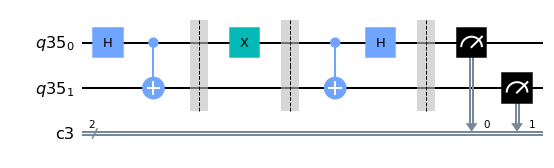

In [13]:
bitstring_to_encode = '10'

qreg = QuantumRegister(len(bitstring_to_encode))
creg = ClassicalRegister(len(bitstring_to_encode))

qc = QuantumCircuit(qreg, creg)

qc = pair_preparation(qc)
qc = encode(qc, bitstring_to_encode)
qc = decode(qc)
qc = measure_qubits(qc)

qc.draw()

In [14]:
aer_simulate_circuit(qc)

{'10': 1024}

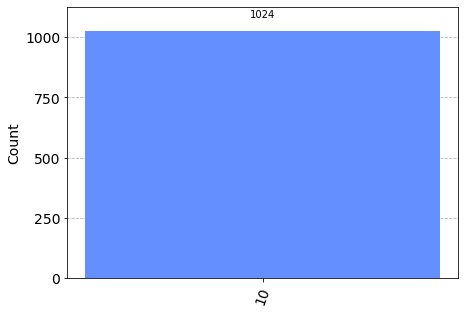

In [15]:
plot_histogram(aer_simulate_circuit(qc)) 